# Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

In [2]:
boston_dataset = load_boston()
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
dir(boston_dataset)


['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.data.shape

(506, 13)

In [7]:
type(boston_dataset.feature_names)

numpy.ndarray

In [8]:
# Actual prices are in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Pandas Data frame

In [9]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

data['PRICE'] = boston_dataset.target

In [10]:
data.head()
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [11]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Check for missing values

In [12]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Histogram barchart & distributions

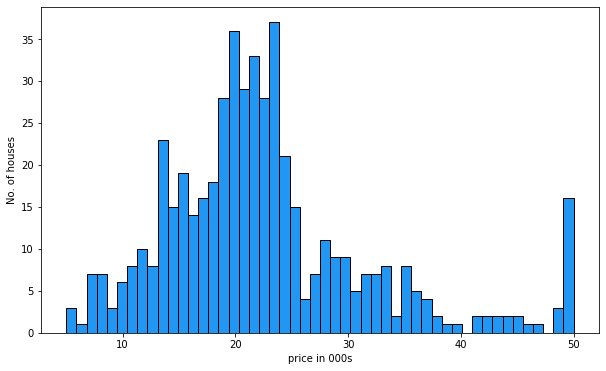

In [14]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins = 50, ec = 'black', color = '#2196F3')
plt.xlabel("price in 000s")
plt.ylabel("No. of houses") # No of houses in some price range
plt.show()

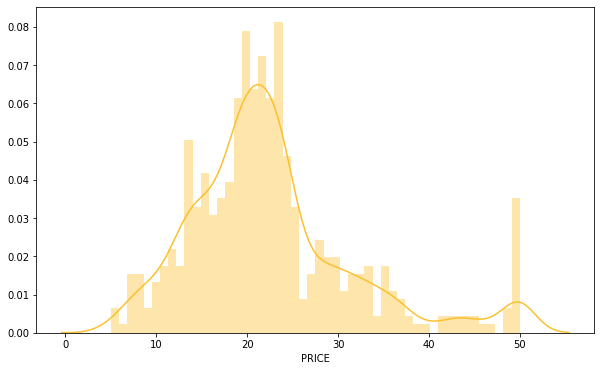

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, hist = True, kde = True, color = '#fbc02d')
plt.show()

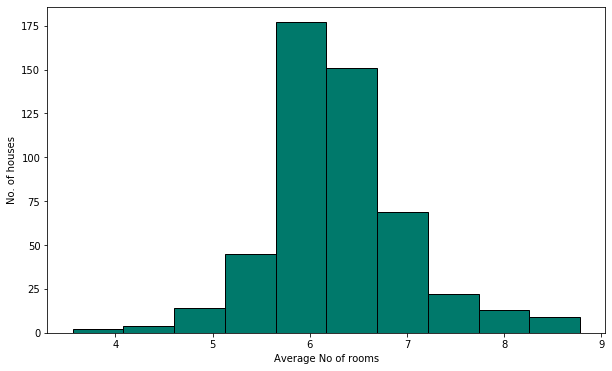

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec = 'black', color = '#00796b')
plt.xlabel("Average No of rooms")
plt.ylabel("No. of houses") # No of houses in some pr ice range
plt.show()

In [17]:
data['RM'].mean()

6.284634387351787

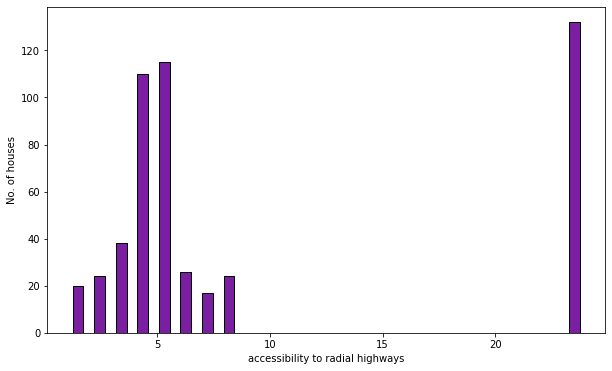

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins = 24, ec = 'black', color = '#7B1FA2', rwidth = 0.5)
plt.xlabel("accessibility to radial highways")
plt.ylabel("No. of houses") # No of houses in some pr ice range
plt.show()

In [19]:
print(data['RAD'].value_counts())

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


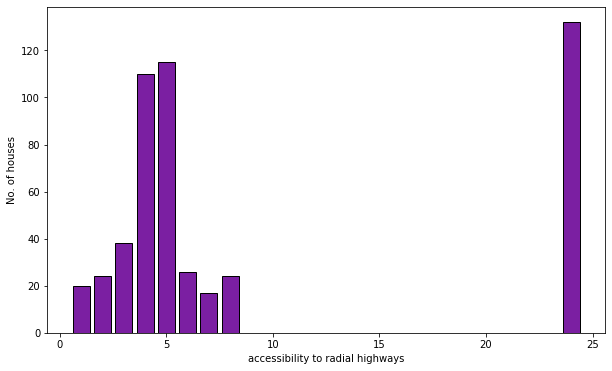

In [20]:
frequency = data['RAD'].value_counts()
# type(frequency)
# frequency.index
frequency.axes[0]

plt.figure(figsize=(10,6))
plt.bar(frequency.index, height = frequency, ec = 'black', color = '#7B1FA2')
plt.xlabel("accessibility to radial highways")
plt.ylabel("No. of houses") # No of houses in some pr ice range
plt.show()

In [21]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive statistics

In [22]:
data['PRICE'].min()

5.0

In [23]:
data['PRICE'].max()

50.0

In [24]:
data.min()


CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [25]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [26]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [27]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [28]:
dir(data)

['AGE',
 'B',
 'CHAS',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'NOX',
 'PRICE',
 'PTRATIO',
 'RAD',
 'RM',
 'T',
 'TAX',
 'ZN',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 

In [29]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
data['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq + 1.0 $$

In [31]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [32]:
type(data['PRICE'].corr(data['PTRATIO']))

numpy.float64

In [33]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

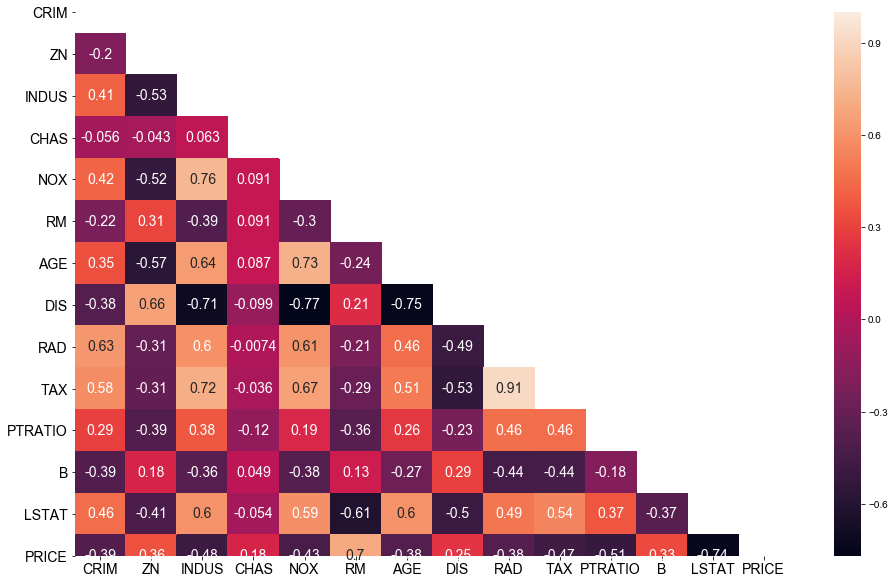

In [35]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), mask = mask, annot = True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

<class 'numpy.float64'>


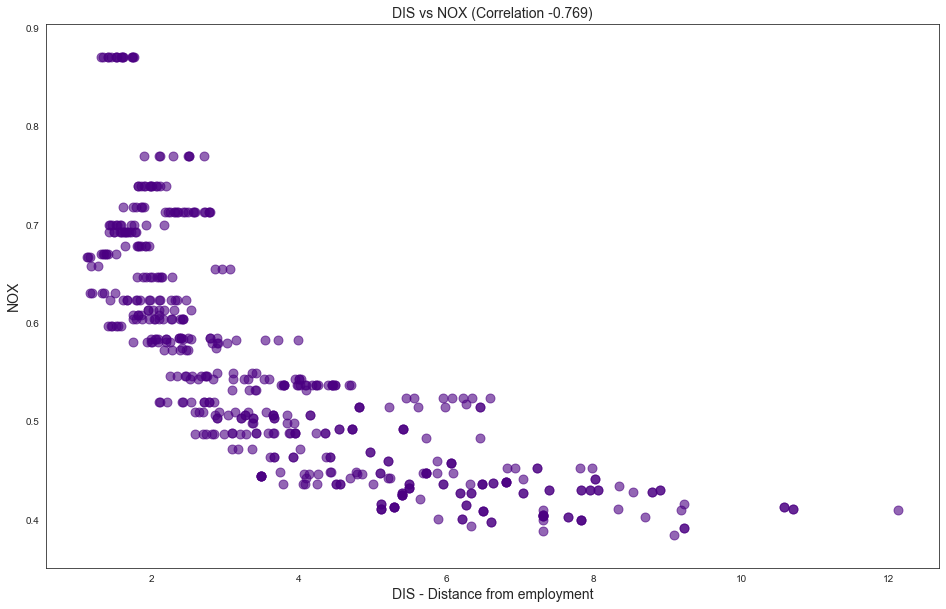

In [36]:
cor = data['DIS'].corr(data['NOX'])
print(type(cor))
nox_dis_corr = round(cor, 3)
plt.figure(figsize = (16,10))
plt.scatter(data['DIS'],data['NOX'], alpha = 0.6, s = 80, color = 'indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize = 14)
plt.xlabel('DIS - Distance from employment', fontsize = 14)
plt.ylabel('NOX', fontsize = 14)
plt.show()


C:\Users\Shuchi Shah\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


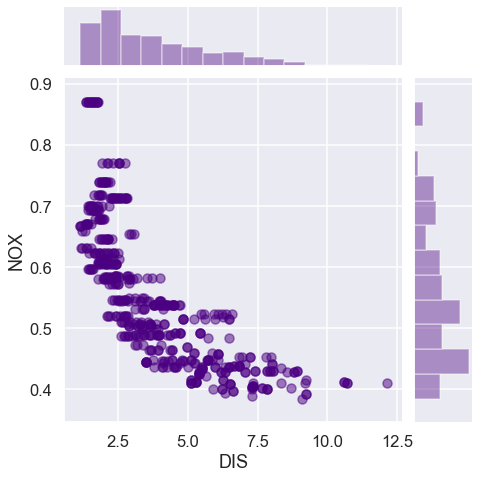

In [37]:
sns.set()
# sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x = data['DIS'], y = data['NOX'], size = 7, color = 'indigo', joint_kws = {'alpha': 0.5})
plt.show()

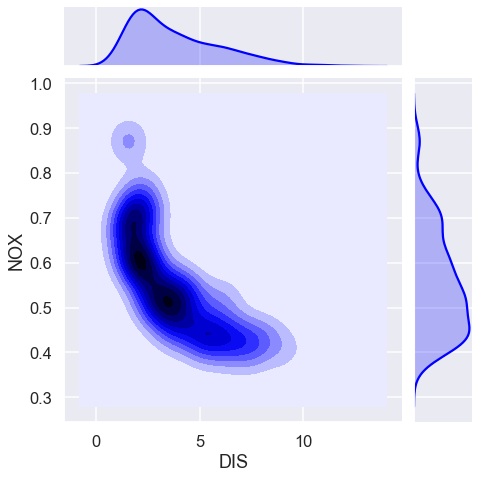

In [38]:
sns.set()
# sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x = data['DIS'], y = data['NOX'], kind = 'kde', size = 7, color = 'blue')
plt.show()

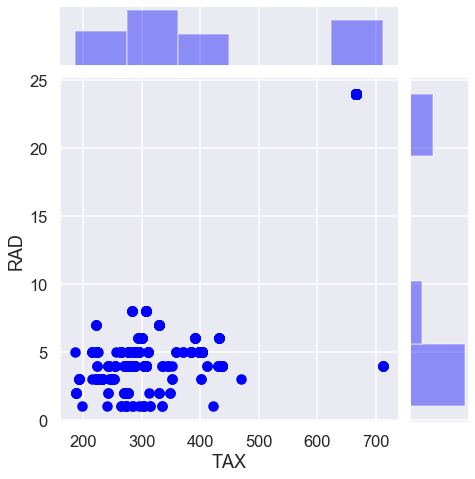

In [39]:
sns.set()
# sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x = data['TAX'], y = data['RAD'], size = 7, color = 'blue')
plt.show()

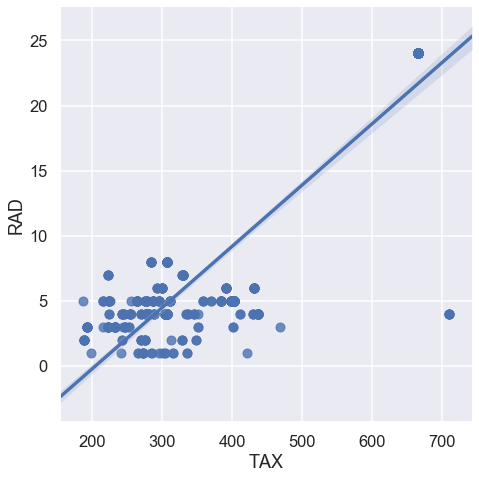

In [40]:
sns.lmplot(x = 'TAX', y = 'RAD', data= data, height=7)
plt.show()

In [41]:
print(data['TAX'].value_counts())
print(data['RAD'].value_counts())

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 66, dtype: int64
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


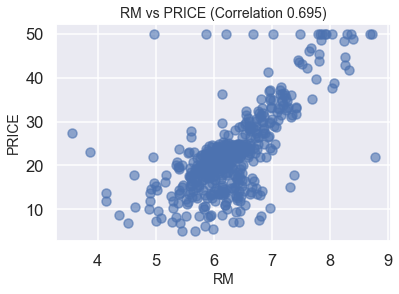

In [42]:
# Sctter plot between RM and price
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)
plt.scatter(data['RM'], data['PRICE'], alpha = 0.6)
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize = 14)
plt.xlabel('RM', fontsize = 14)
plt.ylabel('PRICE', fontsize = 14)
plt.show()

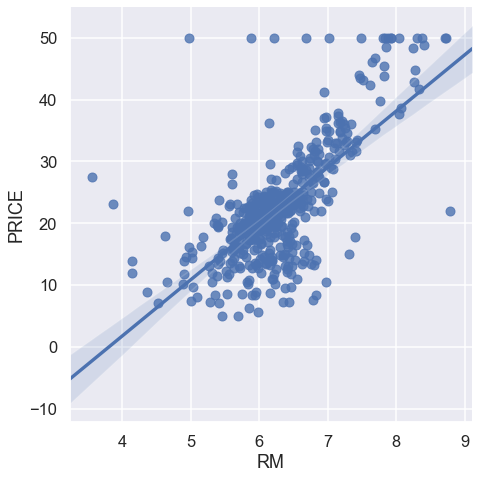

In [43]:
sns.lmplot(x = 'RM', y = 'PRICE', data= data, height = 7)
plt.show()

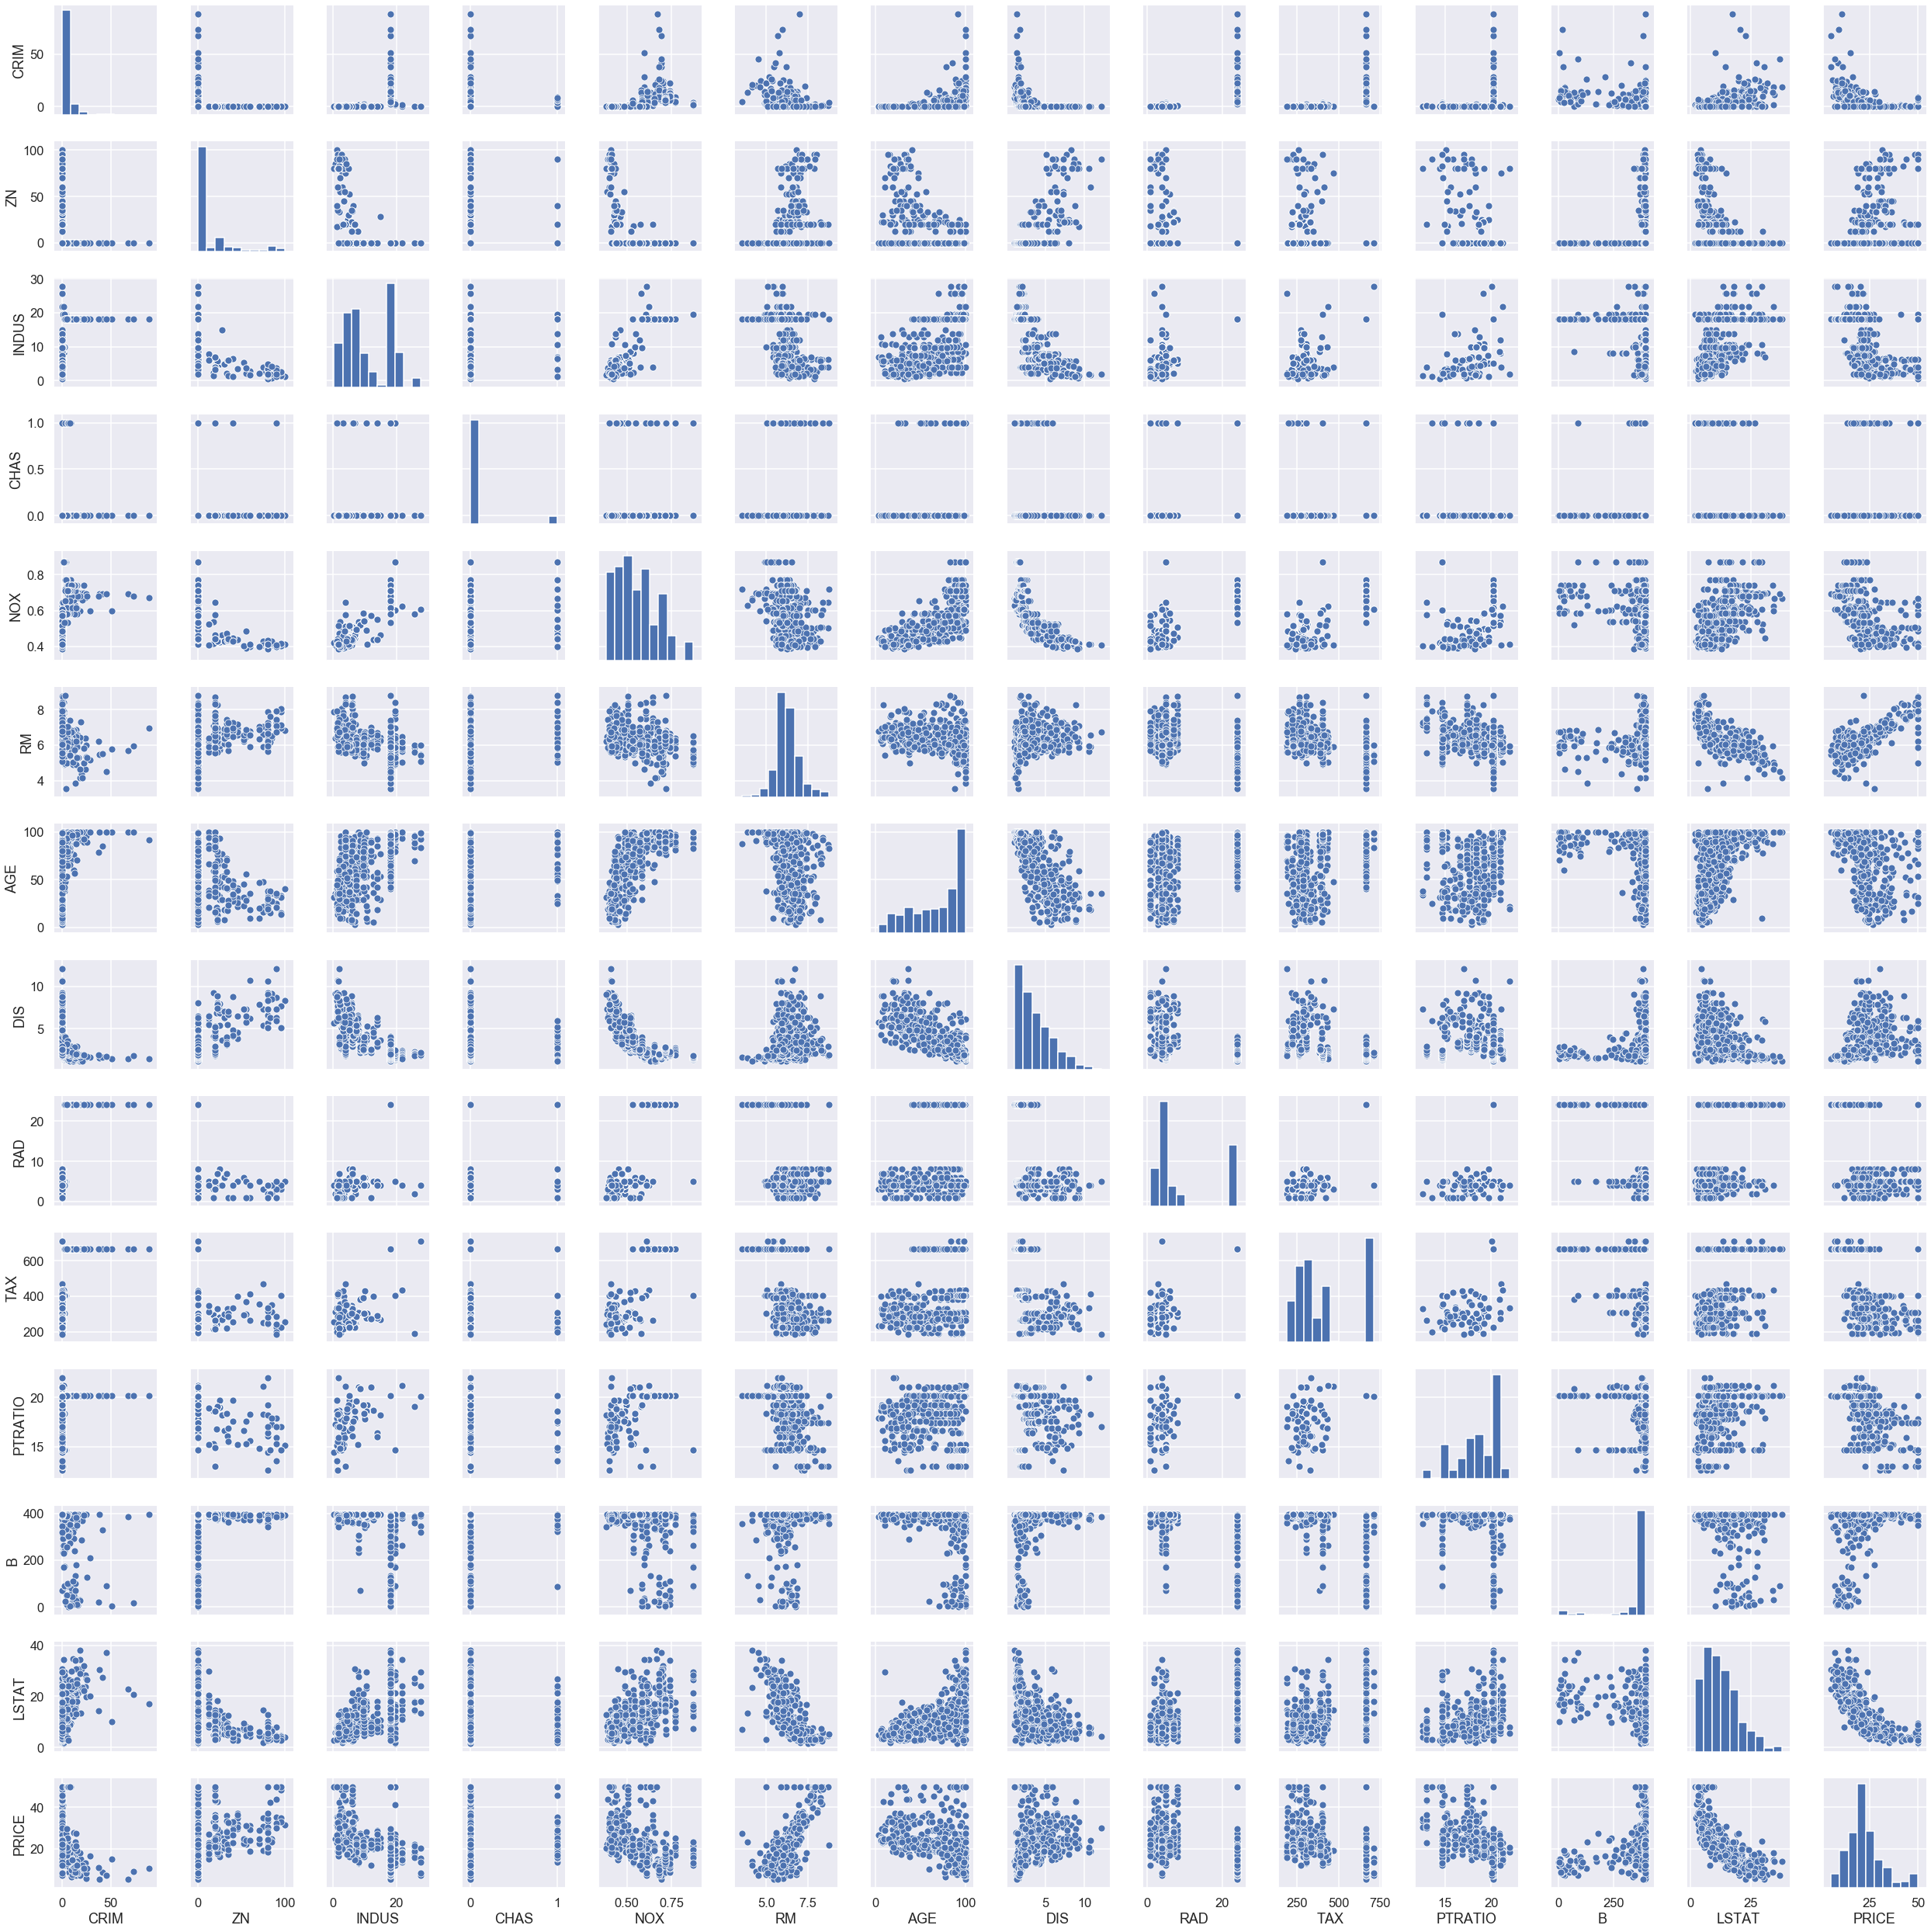

Wall time: 1min 4s


In [44]:
%%time

sns.pairplot(data)
plt.show()

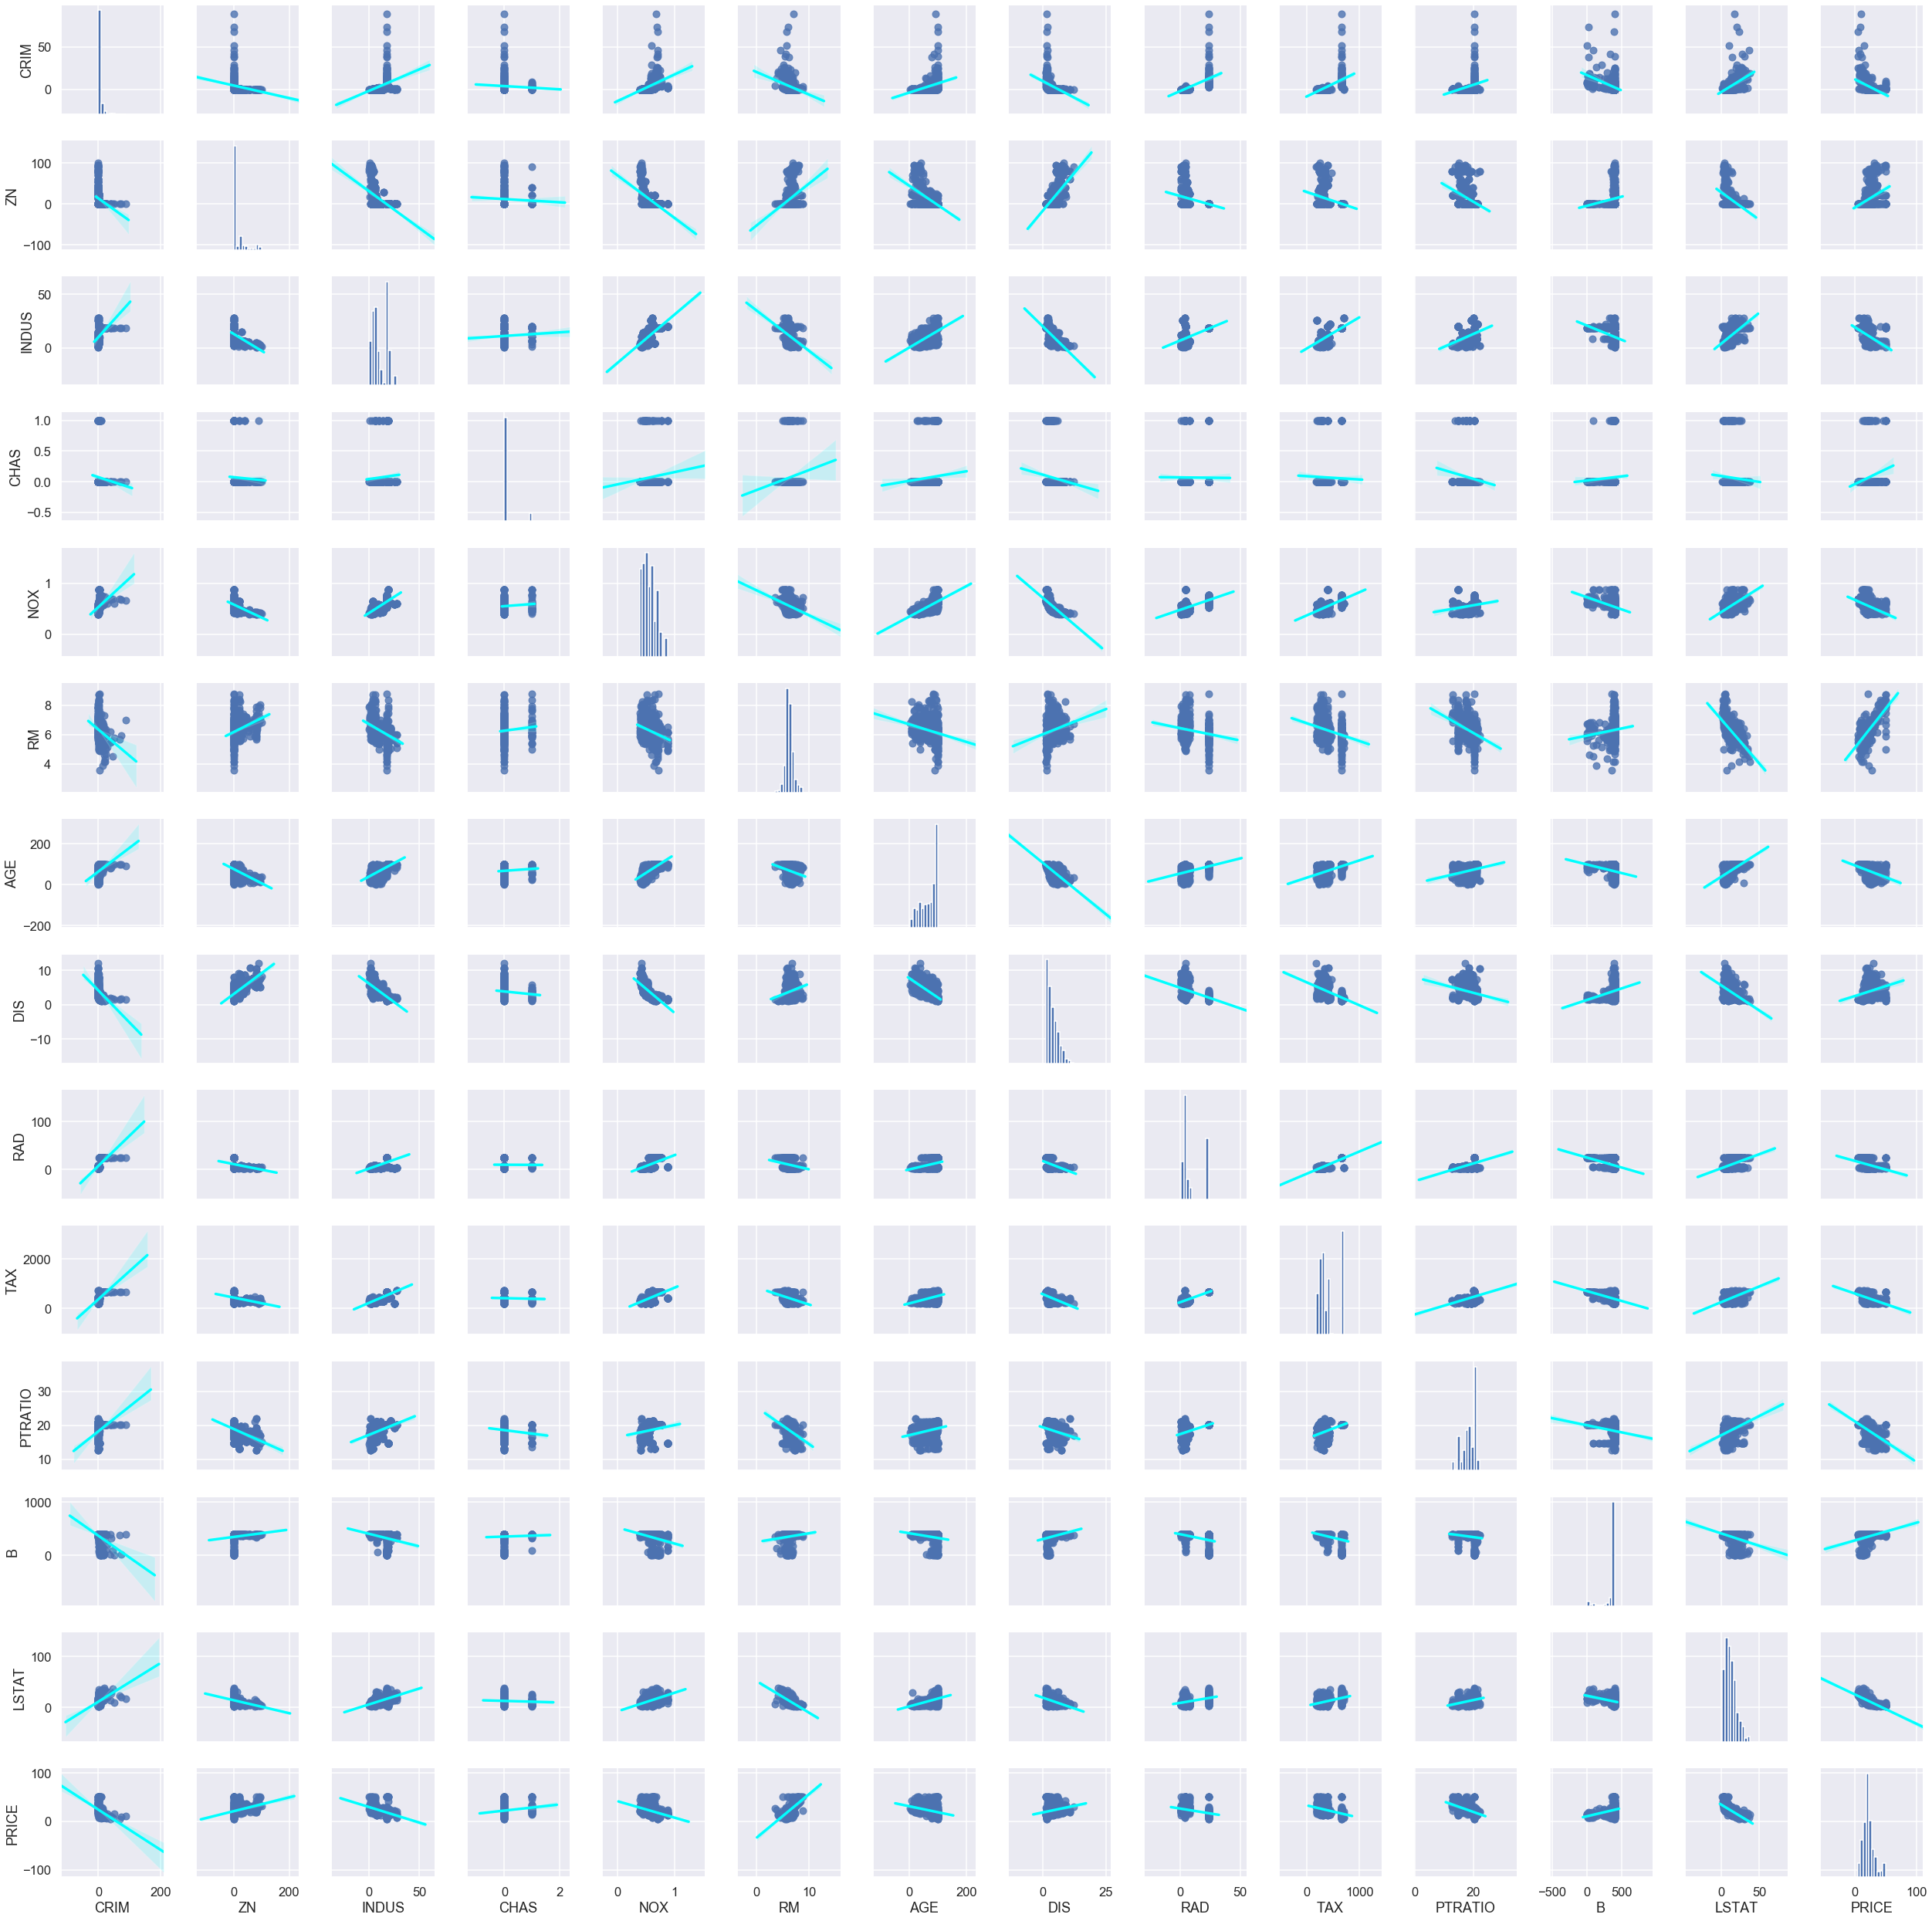

Wall time: 1min 32s


In [45]:
%%time
sns.pairplot(data, kind = 'reg', plot_kws = {'line_kws':{'color':'cyan'}})
plt.show()

## Tarining and test data

In [46]:
prices = data['PRICE']
feature = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    feature, prices, test_size = 0.2, random_state = 10)

# % of training set
len(X_train)/ len(feature)

0.7984189723320159

In [47]:
X_test.shape[0]/ feature.shape[0]

0.2015810276679842

## Multivariable Regression

In [48]:
liner_regression = LinearRegression()
liner_regression.fit(X_train, y_train)

print('intercept: ', liner_regression.intercept_)
print(X_train.columns)

# r-squred for train & test
print("r-squred train: ", liner_regression.score(X_train, y_train))
print("r-squred test: ", liner_regression.score(X_test, y_test))

pd.DataFrame(data = liner_regression.coef_, index = X_train.columns, columns=['coef'])


intercept:  36.53305138282439
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
r-squred train:  0.750121534530608
r-squred test:  0.6709339839115628


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [49]:
data['PRICE'].skew()

1.1080984082549072

In [50]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [51]:
y_log.skew()

-0.33032129530987864

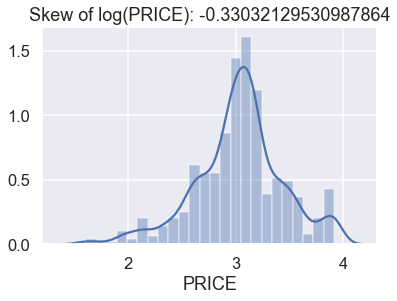

In [52]:
sns.distplot(y_log)
plt.title(f'Skew of log(PRICE): {y_log.skew()}')
plt.show()

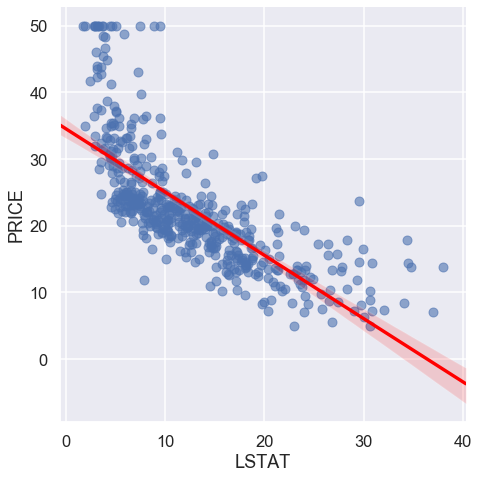

In [53]:
sns.lmplot(x = 'LSTAT', y = 'PRICE', data=data, height = 7, 
           scatter_kws = {'alpha': 0.6}, line_kws = {'color' : 'red'})

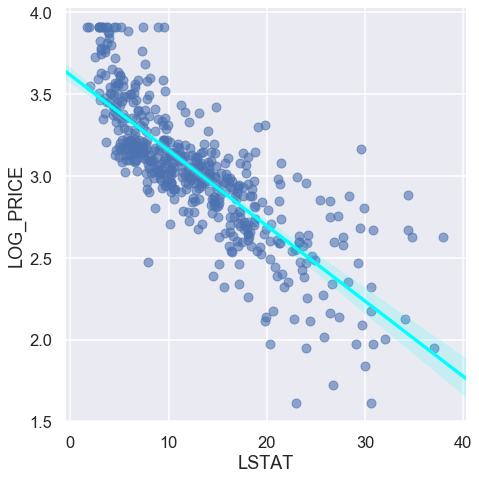

In [54]:
transformed_data = feature
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x = 'LSTAT', y = 'LOG_PRICE', data=transformed_data, height = 7, 
           scatter_kws = {'alpha': 0.6}, line_kws = {'color' : 'cyan'})

In [55]:
prices = np.log(data['PRICE'])
feature = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    feature, prices, test_size = 0.2, random_state = 10)

# % of training set
len(X_train)/ len(feature)

0.7984189723320159

In [56]:
liner_regression = LinearRegression()
liner_regression.fit(X_train, y_train)

print('intercept: ', liner_regression.intercept_)
print(X_train.columns)

# r-squred for train & test
print("r-squred train: ", liner_regression.score(X_train, y_train))
print("r-squred test: ", liner_regression.score(X_test, y_test))

pd.DataFrame(data = liner_regression.coef_, index = X_train.columns, columns=['coef'])


intercept:  4.05994387177519
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
r-squred train:  0.7930234826697583
r-squred test:  0.7446922306260724


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [57]:
# Charles river cost value
np.e**0.080331

1.0836456950439142

## p values & Evaluating coeffiecients

In [58]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

results.params
print(type(results.pvalues))

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

C:\Users\Shuchi Shah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'pandas.core.series.Series'>


,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_1 NOX + ... + \alpha_{12} LSTAT $$

$$ VIF _{TAX} = \frac{1} {(1 - R _{TAX} ^ 2)} $$

In [59]:
variance_inflation_factor(X_incl_const.values, exog_idx=1)
# print(X_incl_const)

1.7145250443932485

In [60]:
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [61]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(X_incl_const.values, exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [62]:
vif = []

for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(X_incl_const.values, exog_idx=i))
print(vif)
print(type(vif))

# Approach 2:
# vif = [variance_inflation_factor(X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]
# print(vif)

pd.DataFrame({'coef_name' : X_incl_const.columns,
             'vif' : np.around(vif,3)})

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]
<class 'list'>


,coef_name,vif
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


In [63]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Model Simplification & the BIC

In [66]:
#Original model with log prices and all features 
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

